<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/Ejemplo_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
df =df.drop(['PassengerId','Name','SibSp','Parch',"Ticket","Fare","Cabin","Embarked"],axis=1)
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [16]:
df['Sex']  = [1 if x=="female" else 0 for x in df['Sex']]
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [21]:
df = df.dropna()

In [33]:
X = df.copy()
X = X.drop(['Survived'], axis=1)
X

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Survived'],
                                                    test_size=0.2, random_state=42
                                                    )

In [35]:
X_train

,Pclass,Sex,Age
328,3,1,31.0
73,3,0,26.0
253,3,0,30.0
719,3,0,33.0
666,2,0,25.0
...,...,...,...
92,1,0,46.0
134,2,0,25.0
337,1,1,41.0
548,3,0,33.0


In [24]:
from sklearn.naive_bayes import CategoricalNB

In [36]:
modelo = CategoricalNB(force_alpha=True)

In [37]:
modelo.fit(X_train, y_train)

CategoricalNB(force_alpha=True)

In [38]:
y_pred = modelo.predict(X_test)

acc: 0.7762237762237763
precision: 0.765605493133583
recall: 0.7620073891625616
f1: 0.7762237762237763


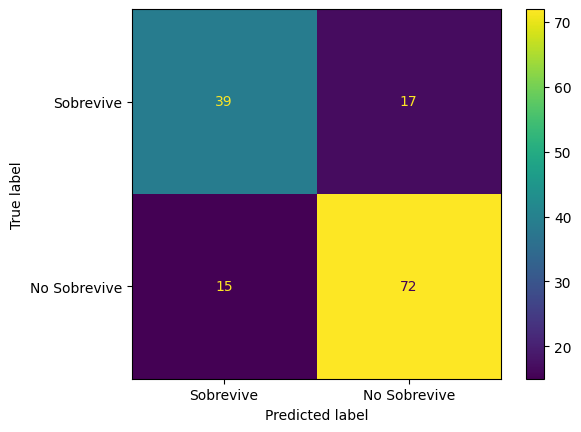

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')
